## Multiple Linear Regression

Jika <i>simple linear regression</i> hanya melibatkan satu variabel bebas $x$, maka __Multiple Linear Regression__ adalah <i>linear regression</i> yang melibatkan lebih dari satu variabel bebas $x$. Formulanya dapat ditulis sebagai berikut.
<br>
<br>
$$
y = \theta_0 + \theta_1  x_1 + \theta_2  x_2 + \theta_3  x_3 \cdots
$$
<br>
<br>

## Dataset

Dataset <a href='https://archive.ics.uci.edu/ml/datasets/automobile'>Automobile</a> 

__Attribute Information:__

1. __symboling:__ -3, -2, -1, 0, 1, 2, 3.
2. __normalized-losses:__ continuous from 65 to 256.
3. __make:__
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. __fuel-type:__ diesel, gas.
5. __aspiration:__ std, turbo.
6. __num-of-doors:__ four, two.
7. __body-style:__ hardtop, wagon, sedan, hatchback, convertible.
8. __drive-wheels:__ 4wd, fwd, rwd.
9. __engine-location:__ front, rear.
10. __wheel-base:__ continuous from 86.6 120.9.
11. __length:__ continuous from 141.1 to 208.1.
12. __width:__ continuous from 60.3 to 72.3.
13. __height:__ continuous from 47.8 to 59.8.
14. __curb-weight:__ continuous from 1488 to 4066.
15. __engine-type:__ dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. __num-of-cylinders:__ eight, five, four, six, three, twelve, two.
17. __engine-size:__ continuous from 61 to 326.
18. __fuel-system:__ 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. __bore:__ continuous from 2.54 to 3.94.
20. __stroke:__ continuous from 2.07 to 4.17.
21. __compression-ratio:__ continuous from 7 to 23.
22. __horsepower:__ continuous from 48 to 288.
23. __peak-rpm:__ continuous from 4150 to 6600.
24. __city-mpg:__ continuous from 13 to 49.
25. __highway-mpg:__ continuous from 16 to 54.
26. __price:__ continuous from 5118 to 45400.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<i>load</i> dataset ke dalam dataframe Pandas dengan <code>read_csv()</code>.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/My Drive/Colab Notebooks/DATASET/datasets_py/

/content/gdrive/My Drive/Colab Notebooks/DATASET/datasets_py


In [4]:
# Definisikan format missing values yang mungkin ada
missing_value_format = ['N.A', 'na', 'n.a.', 'n/a', '?', '-']

# Load dataset 
df = pd.read_csv('automobile.data', header=None, na_values=missing_value_format)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN


In [5]:
# Membuat list nama kolom
column_names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
              'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
              'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
              'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

# Mengubah nama kolom
df.columns = column_names

pd.set_option('display.max_columns', 100)     # Menampilkan seluruh kolom
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


## Analisis dan visualisasi data

In [6]:
# Cek info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Terlihat bahwa ada beberapa kolom yang memiliki <i>missing values</i>. 

In [7]:
# Menampilkan deskripsi statistik

df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


menampilkan hubungan antarvariabel <code>price</code> dan <code>horsepower</code>.

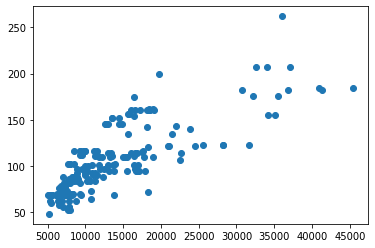

In [8]:
# Scatter plot kolom 'price' dan 'horsepower'

plt.scatter(df['price'], df['horsepower'])
plt.show()

visualisasi dari empat variabel seperti di bawah ini.

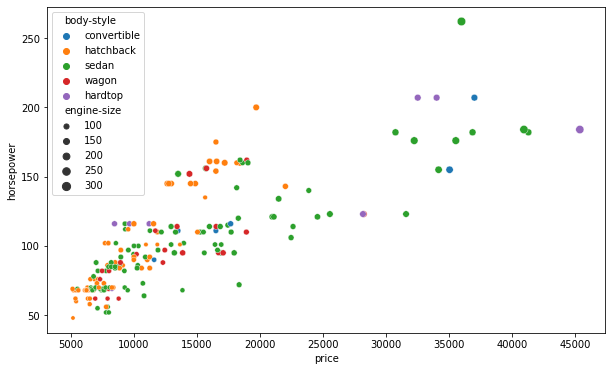

In [9]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=df, x='price', y='horsepower', hue='body-style', size='engine-size')
plt.show()

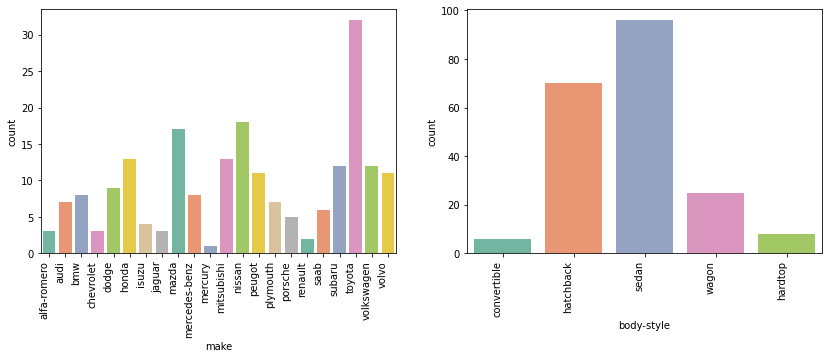

In [10]:
# Menampilkan countplot dari 'make' dan 'body-style'

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(14, 5)) 

# Menambahkan subplot dengan indexing
ax0 = fig.add_subplot(ax[0]) 
ax1 = fig.add_subplot(ax[1])  

sns.countplot(x='make', data=df, palette='Set2', ax=ax0)
sns.countplot(x='body-style', data=df, palette='Set2', ax=ax1)

fig.autofmt_xdate(rotation=90)
plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()

## Data Preparation / Preprocessing

### Missing values

hapus baris data yang mengandung <i>missing values</i> pada kolom <code>price</code> karena kolom tersebut merupakan kolom target sehingga sebaiknya tidak sembarangan mengisi <i>missing values</i>.

In [11]:
# Menghapus baris yang mengandung mising values di kolom price
df.dropna(subset=['price'], axis=0, inplace=True)

# Me-reset indeks karena ada data yang terhapus
df.reset_index(drop=True, inplace=True)

Selanjutnya untuk <i>missing values</i> pada kolom lainnya, isi dengan nilai rata-rata. Khusus untuk kolom <code>num-of-doors</code> akan diganti dengan __'four'__ yang merupakan nilai modus dari kolom tersebut.

In [12]:
# Mengganti missing values dengan 'four' untuk kolom num-of-doors
df['num-of-doors'].fillna('four', inplace=True)

# Mengganti missing values dengan mean-nya untuk kolom lainnya
avg_norm = df['normalized-losses'].astype('float').mean(axis=0)
df['normalized-losses'].replace(np.nan, avg_norm, inplace=True)

avg_stroke = df['stroke'].astype('float').mean(axis=0)
df['stroke'].replace(np.nan, avg_stroke, inplace=True)

avg_bore = df['bore'].astype('float').mean(axis=0)
df['bore'].replace(np.nan, avg_bore, inplace=True)

avg_horse = df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, avg_horse, inplace=True)

avg_peak = df['peak-rpm'].astype('float').mean(axis=0)
df['peak-rpm'].replace(np.nan, avg_norm, inplace=True)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


### Mengubah tipe data

ubah tipe data dari kolom yang belum sesuai tipenya dengan jenis data pada tiap kolom.

In [13]:
# Konversi tipe data

df[['bore', 'stroke', 'peak-rpm']] = df[['bore', 'stroke', 'peak-rpm']].astype('float')
df[['normalized-losses', 'horsepower']] = df[['normalized-losses', 'horsepower']].astype('int')
df[['price']] = df[['price']].astype('float')

In [14]:
# Cek tipe data

df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

### Encoding

proses <i>encoding</i> kolom dengan data kategori menjadi numerik. Sebelumnya mari kita pisahkan terlebih dahulu data fitur dan targetnya.

In [15]:
# Mendefinisikan data fitur dan target

df_features = df.drop('price', axis=1)
df_target = df['price']

Kemudian kita lakukan <i>encoding</i> pada beberapa kolom di <code>df_features</code> dengan <code>OrdinalEncoder()</code>.

In [16]:
from sklearn.preprocessing import OrdinalEncoder

# Encoding data kategori
ord_encode = OrdinalEncoder()
df_features['make'] = ord_encode.fit_transform(df_features[['make']])
df_features['fuel-type'] = ord_encode.fit_transform(df_features[['fuel-type']])
df_features['aspiration'] = ord_encode.fit_transform(df_features[['aspiration']])
df_features['num-of-doors'] = ord_encode.fit_transform(df_features[['num-of-doors']])
df_features['body-style'] = ord_encode.fit_transform(df_features[['body-style']])
df_features['drive-wheels'] = ord_encode.fit_transform(df_features[['drive-wheels']])
df_features['engine-location'] = ord_encode.fit_transform(df_features[['engine-location']])
df_features['engine-type'] = ord_encode.fit_transform(df_features[['engine-type']])
df_features['num-of-cylinders'] = ord_encode.fit_transform(df_features[['num-of-cylinders']])
df_features['fuel-system'] = ord_encode.fit_transform(df_features[['fuel-system']])

In [17]:
# Menampilkan dataframe hasil encoding

df_features[['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
             'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']].head(10)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,2.0,5.0
1,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,2.0,5.0
2,0.0,1.0,0.0,1.0,2.0,2.0,0.0,4.0,3.0,5.0
3,1.0,1.0,0.0,0.0,3.0,1.0,0.0,2.0,2.0,5.0
4,1.0,1.0,0.0,0.0,3.0,0.0,0.0,2.0,1.0,5.0
5,1.0,1.0,0.0,1.0,3.0,1.0,0.0,2.0,1.0,5.0
6,1.0,1.0,0.0,0.0,3.0,1.0,0.0,2.0,1.0,5.0
7,1.0,1.0,0.0,0.0,4.0,1.0,0.0,2.0,1.0,5.0
8,1.0,1.0,1.0,0.0,3.0,1.0,0.0,2.0,1.0,5.0
9,2.0,1.0,0.0,1.0,3.0,2.0,0.0,2.0,2.0,5.0


### Normalisasi

Selanjutnya adalah normalisasi data dengan <code>StandardScaler()</code>.

In [18]:
from sklearn.preprocessing import StandardScaler

cols = list(df_features.columns)

df_features_scaled = pd.DataFrame(data = df_features)
df_features_scaled[cols] = StandardScaler().fit_transform(df_features[cols])
df_features_scaled.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,1.725050,0.000000,-1.971717,0.332411,-0.467099,1.156378,-3.034335,1.213477,-0.123091,-1.685107,-0.439409,-0.853460,-2.034081,-0.014858,-2.325124,-0.171457,0.075389,0.867123,0.520894,-1.829927,-0.291435,0.204090,-0.098668,-0.652249,-0.542288
1,1.725050,0.000000,-1.971717,0.332411,-0.467099,1.156378,-3.034335,1.213477,-0.123091,-1.685107,-0.439409,-0.853460,-2.034081,-0.014858,-2.325124,-0.171457,0.075389,0.867123,0.520894,-1.829927,-0.291435,0.204090,-0.098668,-0.652249,-0.542288
2,0.127193,0.000000,-1.971717,0.332411,-0.467099,1.156378,-0.715318,1.213477,-0.123091,-0.710103,-0.244152,-0.185597,-0.559713,0.518080,2.136451,1.104946,0.606234,0.867123,-2.433435,0.675938,-0.291435,1.357754,-0.098668,-0.964397,-0.689386
3,0.926121,1.315931,-1.811395,0.332411,-0.467099,-0.864769,0.444190,-0.606739,-0.123091,0.165748,0.195176,0.148335,0.218425,-0.423766,-0.094337,-0.171457,-0.431327,0.867123,-0.526210,0.453899,-0.041121,-0.037374,0.628109,-0.184027,-0.100993
4,0.926121,1.315931,-1.811395,0.332411,-0.467099,-0.864769,0.444190,-2.426955,-0.123091,0.099646,0.195176,0.243744,0.218425,0.520017,-0.094337,-1.447860,0.220165,0.867123,-0.526210,0.453899,-0.541748,0.311408,0.628109,-1.120471,-1.277779


### Train test split

Membagi data menjadi data latih dan data uji dengan <i>train test split</i>. <i>Multiple linear regression</i> berarti menggunakan lebih dari satu data fitur, jadi disini menggunakan semua fitur dalam dataset.

In [19]:
from sklearn.model_selection import train_test_split

# Membagi data dengan train test split
X_train, X_test, y_train, y_test = train_test_split(df_features_scaled, df_target, test_size=0.2, random_state=45)

In [20]:
# Menampilkan data X_train dan X_test

print('Train set:', X_train.shape,  y_train.shape)
print(X_train.head())
print('\n')
print('Test set:', X_test.shape,  y_test.shape)
print(X_test.head())

Train set: (160, 25) (160,)
     symboling  normalized-losses      make  fuel-type  aspiration  \
175   1.725050           2.349877  1.074394   0.332411   -0.467099   
138  -0.671736          -0.626634  0.914073   0.332411   -0.467099   
67   -1.470664          -0.908619 -0.528822  -3.008322    2.140872   
176  -1.470664          -1.002614  1.074394   0.332411   -0.467099   
116   0.127193          -0.093995  0.272786   0.332411    2.140872   

     num-of-doors  body-style  drive-wheels  engine-location  wheel-base  \
175      1.156378   -0.715318      1.213477        -0.123091    0.678039   
138     -0.864769    0.444190     -0.606739        -0.123091   -0.263915   
67      -0.864769    0.444190      1.213477        -0.123091    2.776776   
176     -0.864769    0.444190      1.213477        -0.123091    0.942446   
116      1.156378   -0.715318     -0.606739        -0.123091   -0.842307   

       length     width    height  curb-weight  engine-type  num-of-cylinders  \
175  0.756540

## Modeling

### Linear Regression dengan beberapa variabel bebas

Tidak berbeda dengan <i>simple linear regression</i>, gunakan <i>package</i> <code>LinearRegression</code> untuk <i>multiple linear regression</i>.

In [21]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Menampilkan koefisien tiap fitur

lr_model.coef_

array([   77.38378274,  -260.85179152, -1243.48223113,  -503.1686252 ,
         101.41712856,    36.75108824,  -621.3571906 ,   891.39632652,
        1273.29454614,   680.66108837,   -87.98461616,  1544.12644126,
         719.15165268,   482.7664616 ,   325.87313709,  -154.38464061,
        2804.89689708,   -21.01763766,   -67.26140805,  -882.03023251,
          77.61720544,  1734.93859551,   317.63007854, -1065.79025346,
        1090.92598721])

tampilkan <i>intercept</i>-nya.

In [23]:
# Menampilkan intercept

lr_model.intercept_

13149.418965195553

### Prediksi

In [24]:
# Menguji model

y_pred = lr_model.predict(X_test)
y_pred

array([28142.65324341, 22029.37729321, 10819.55346565, 12098.60233832,
        6359.31071455, 20672.9344397 , 14079.21000298, 14640.6965233 ,
       12807.61525416, 27954.67585474,  8183.06691907,  4052.75605686,
       18441.88909663,  7877.6914081 , 17684.02883596,  8396.6617022 ,
       16070.25327254, 13112.85649873, 30169.24253093, 16087.55995591,
       15241.30289976,  6314.06173891,  8418.99651166, 10268.25613168,
        9453.2982613 , 14664.87240655, 16018.79643619,  7958.9860239 ,
        8277.87562159,  9801.14792158,  5999.37030501, 15921.4865579 ,
       19090.80933484, 16012.1651963 ,  6669.86322638,  9305.56941672,
       25647.76461998, 10742.42146581, 14047.98621481, 15651.81119836,
       10341.73510816])

### Evaluasi

evaluasi kinerja model dengan <code>r2_score</code>.

In [25]:
from sklearn.metrics import r2_score

# Menampilkan nilai r2 score
print("R2-score: %.2f" % r2_score(y_pred, y_test))

R2-score: 0.81




---


Semoga Bermanfaat dan jangan lupa main-main kesini: <a href="https://nurpurwanto.github.io/">**nurpurwanto**</a> Terimakasih.

---


